# Un exemple de système chaotique

## Introduction

Ce projet explore le comportement chaotique des systèmes dynamiques en s'appuyant sur l’équation logistique. Bien que simple, cette équation illustre la sensibilité aux conditions initiales, une caractéristique clé du chaos déterministe.

Nous analyserons comment une légère perturbation de l’état initial peut engendrer des trajectoires radicalement différentes, mettant en évidence la transition entre régime stable, bifurcations et chaos en fonction du paramètre de croissance $r$.

À travers des simulations et des visualisations, nous mettrons en lumière l’apparition du chaos et ses implications, notamment en modélisation des populations.

## Présentatation du problème

On postule que l'effectif d'une population à la génération $p$ est donnée par l'équation $ n_p = \alpha^p n_0 $ avec $\alpha$ le taux d'accroissement de la population. Lorsque ce taux d'accroissement n'est plus constant mais dépend de $n_i$ (pour tenir compte de la raréfaction des ressources ou de l'effet des prédateurs), le taux d'accroissement peut s'écrire $ \alpha = r \left( 1 - \frac{n_i}{n_{\max}} \right) $ avec $r$ le taux d'accroissement maximal et $n_{\max}$ la taille maximale de la population. 

L'effectif d'une population à la génération $p$ devient $ n_{i+1} = r \left( 1 - \frac{n_i}{n_{\max}} \right) n_i $ puis $ x_{i+1} = r (1-x_i)x_i $ en introduisant la variable $x_i = n_i / n_{\max}$

Cette dernière équation est appelée l'équation logistique. Nous voulons étudier le comportement chaotique de cette suite pour des valeurs de r comprises entre 2.5 et 4. 


#### Définition des fonctions de la suite logistique

In [1]:
# Importation des modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Définition des fonctions
def F_logistique(r, x):
    ''' Retourne le résultat de l'équation logistique '''
    return (r * (1 - x) * x)

def element_suite_recurrence(n, fonction, r, x0=0.1):
    ''' Retourne l'élément n de la suite logistique '''
    x = x0
    for i in range(n): 
        x = fonction(r, x)
    return x

def suite_logistique(n, fonction, r, x0=0.1): 
    ''' Retourne la suite logistique jusqu'a l'élément n'''
    return [element_suite_recurrence(k, fonction, r, x0) for k in range(n)]

#### Représentation de la suite logistique pour $x0$ et $r$ donné

In [3]:
#Initialisation des valeurs
N = 100
r = 2.5
x0 = 0.1

In [4]:
#Création de la suite
liste_elements = suite_logistique(N, F_logistique, r, x0)

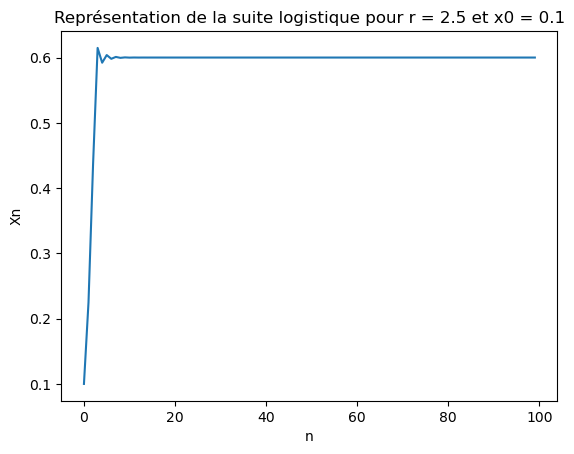

In [7]:
# Tracé de la fonction
x = np.arange(0, N)
plt.plot(x, liste_elements)
plt.xlabel('n')
plt.ylabel('Xn')
plt.title('Représentation de la suite logistique pour r = 2.5 et x0 = 0.1')
plt.show()

On remarque que la suite de converge vers une limite finie rapidement et cette limite vaut 0.6. 

#### Représentation de la suite logistique pour $x0$ donné et différentes valeurs de $r$

In [8]:
# Création des suites pour 3 valeurs de r
liste_elements_1 = suite_logistique(N, F_logistique, 3, x0)
liste_elements_2 = suite_logistique(N, F_logistique, 3.5, x0)
liste_elements_3 = suite_logistique(N, F_logistique, 4, x0)

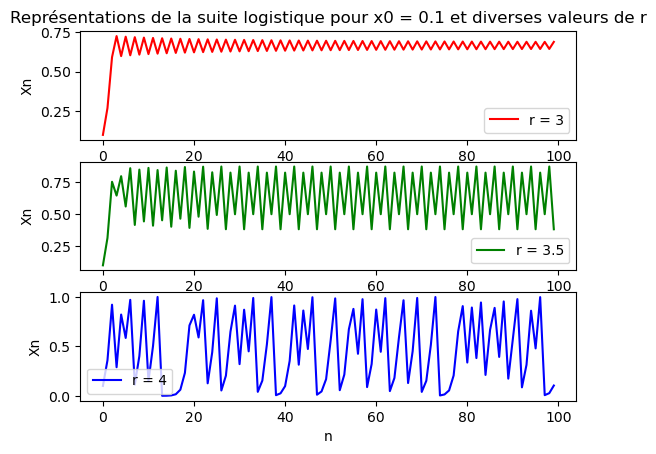

In [9]:
# Tracé des 3 graphes
x = np.arange(0, N)

plt.subplot(3,1,1)
plt.title('Représentations de la suite logistique pour x0 = 0.1 et diverses valeurs de r')
plt.xlabel('n')
plt.ylabel('Xn')
plt.plot(x, liste_elements_1, c='r', label = 'r = 3')
plt.legend()

plt.subplot(3,1,2)
plt.xlabel('n')
plt.ylabel('Xn')
plt.plot(x, liste_elements_2, c='g', label = 'r = 3.5')
plt.legend()

plt.subplot(3,1,3)
plt.xlabel('n')
plt.ylabel('Xn')
plt.plot(x, liste_elements_3, c='b', label = 'r = 4')
plt.legend()
     
plt.show()

On remarque que les suites ne convergent plus pour les 3 valeurs choisies comprises entre 2.5 et 4. 

#### Etude du diagramme de bifurcation

###### Dépendance en fonction de $r$

In [10]:
#Initialisation des valeurs
N = 1000
x0 = 0.00001
r = np.linspace(2.5, 4, 2000)

In [11]:
# Création de l'array de résultats
results = np.array([suite_logistique(N, F_logistique, r[i], x0)[-100:] for i in range(len(r))])

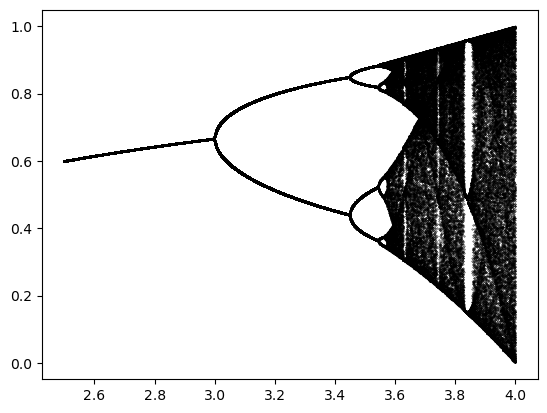

In [10]:
# Création du graphe
r_axis = np.repeat(r, 100)
results_plot = results.flatten()

# Création du graphe
plt.scatter(r_axis, results_plot, s = 0.1, color = 'black')


Nous en concluons que la suite logistique a des comportements differenciés à l'infini en fonction de r. 

- Si $ r \in [2.5, 3] $ la suite converge à l'infini
- Si $ r \in [3, 3.45] $ la suite est alternée et à 2 valeurs d'adhérence
- Si $ r \in [3.45, 3.6] $ la suite est alternée et le nombre de valeurs d'adhérence augmente
- Si $ r \in [3.6, 4] $ la suite comporte un caractère chaotique

###### Relation avec $x0$

Nous choisissons maintenat une valeur différente de x0. Le diagramme de bifurcation sera identique car le comportement a l'infini de la suite ne dépend pas de x0. En effet, soit la suite converge et la limite ne depend pas de x0, soit la suite est chaotique et ne dépend pas non plus de x0. 

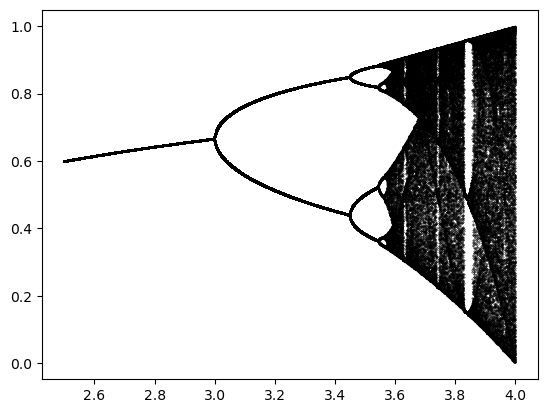

In [15]:
#Initialisation des valeurs
x0 = 0.2

# Création de l'array de résultats
results = np.array([suite_logistique(N, F_logistique, r[i], x0)[-100:] for i in range(len(r))])

# Mise en forme des données
r_axis = np.repeat(r, 100)
results_plot = results.flatten()

# Création du graphe
plt.scatter(r_axis, results_plot, s = 0.1, color = 'black')

#### Etude de l'exposant de Lyapunov

L’exposant de Lyapunov $\lambda$ mesure la sensibilité aux conditions initiales dans l’équation logistique. S’il est négatif, la suite converge vers une valeur stable ; s’il est positif, elle devient chaotique. Il est défini par : $$ \lambda = \lim\limits_{n \rightarrow \infty} \frac{1}{n} \sum_{i=0}^{n-1} \log | f^{\prime} (x_i)| $$

Nous allons calculer $\lambda$ en fonction de r et conclure sur la sensibilité de la suite aux conditions initiales.

In [12]:
# Définition des fonctions pour le ce calcul de l'exposant 
def f_derivee_logistique(r,x): 
    ''' Retourne la derivee de la fonction logistique'''
    return r * (1 - 2 * x)

    
def exposant_Lyapunov(n, fonction, fonction_derivee, r, x0): 
    ''' Retourne l'exposant de Lyapunov'''
    suite_logistique = np.array([element_suite_recurrence(k, fonction, r, x0) for k in range(n)])
    suite_Lyapunov = np.array([fonction_derivee(r, suite_logistique[k])  for k in range(n)])
    exposant = (1/n) * np.log(np.abs(suite_Lyapunov)).sum(axis=0)
    return exposant

In [13]:
#Création de la liste d'exposants
exposants = [exposant_Lyapunov(1000, F_logistique, f_derivee_logistique, r[k] , x0) for k in range(len(r))] 

Text(0, 0.5, 'Lambda')

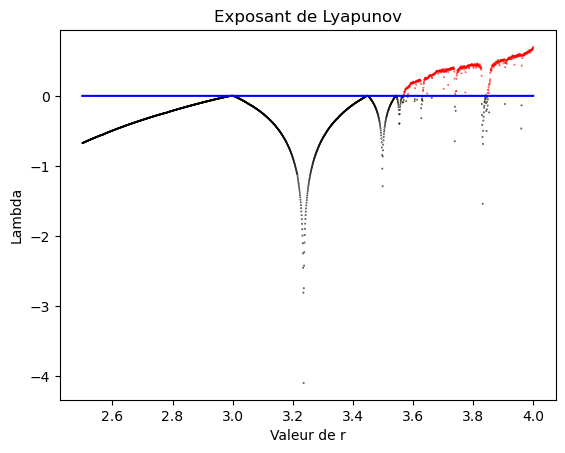

In [14]:
# Mise en forme conditonnelle des couleurs
colors = ['red' if expo > 0 else 'black' for expo in exposants]

# Création du graphe
plt.scatter(r, exposants, s = 0.1, color = colors)
plt.plot(r, np.zeros(len(r)), color = 'b')
plt.title('Exposant de Lyapunov')
plt.xlabel('Valeur de r')
plt.ylabel('Lambda')

Nous retrouvons les mêmes valeurs de bifurcation pour la convergence de la suite en fonction de $r$. En analysant les deux graphes, il semble que lorsque les valeurs de $\lambda$ sont négatives, la suite converge, tandis que lorsqu'elles sont positives, la suite diverge. Chaque point de bifurcation apparaît lorsque $\lambda$ s’annule.

Pour $r > 3.5$, $\lambda$ est majoritairement positif, ce qui explique l’apparition du chaos. Cependant, certaines valeurs de r font réapparaître des zones où $\lambda$ devient brièvement négatif. Cela correspond aux bandes blanches observées dans le diagramme de bifurcation : lorsque $\lambda$ est négatif sur de courts intervalles, la suite logistique retrouve temporairement une dynamique alternée avec des valeurs d’adhérence finies.

## Conclusion

L’étude de l’équation logistique nous a permis de mettre en évidence la transition entre des dynamiques stables et un comportement chaotique en fonction du paramètre de croissance 
$r$. Nous avons aussi illustré la sensibilité aux conditions initiales, mesurée par l'exposant de Lyapunov, caractéristique essentielle du chaos déterministe, où de légères variations peuvent entraîner des évolutions radicalement différentes. 